# K-means

In [1]:
#K-means Clustering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
X = dataset.iloc[:, [3, 4]].values

In [3]:
# Fitting K-Means to the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\cs\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


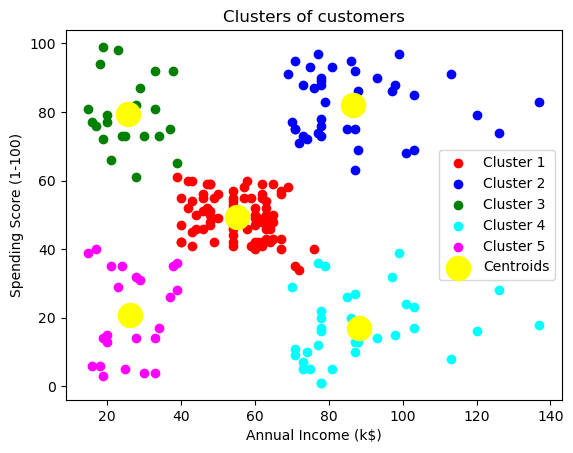

In [4]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Hierarchical Clistering

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


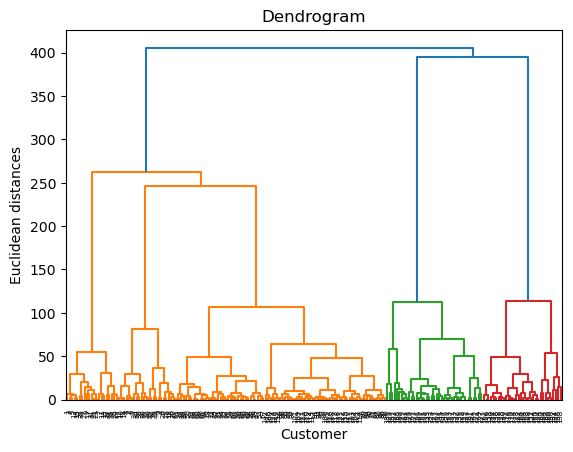

In [7]:
x = dataset.iloc[:,[3,4]].values

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Customer")
plt.ylabel("Euclidean distances")
plt.show()

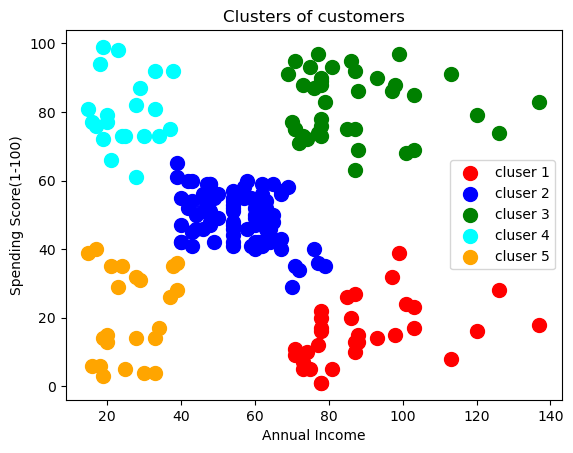

In [8]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = "red", label = "cluser 1")
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = "blue", label = "cluser 2")
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = "green", label = "cluser 3")
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = "cyan", label = "cluser 4")
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = "orange", label = "cluser 5")
plt.title("Clusters of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()

# Density Based Clustering

In [17]:
#Density Based Clustering
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Read data from CSV file
data = pd.read_csv('blobs.csv')
data

,0,1
0,8.622185,1.935796
1,-4.736710,-7.970958
2,9.621222,0.925423
3,6.162095,-0.273254
4,8.697488,-1.057452
...,...,...
995,8.993880,2.203768
996,-5.082768,-9.644539
997,-6.252268,-8.412482
998,-5.479154,-10.536955


In [19]:
# Extract the features (assuming your CSV file has columns 'Feature1' and 'Feature2')
X = data.iloc[:,[0,1]].values
X

array([[  8.62218539,   1.93579579],
       [ -4.73670958,  -7.97095765],
       [  9.62122205,   0.92542315],
       ...,
       [ -6.2522678 ,  -8.412482  ],
       [ -5.479154  , -10.53695547],
       [  6.12055883,   0.96896287]])

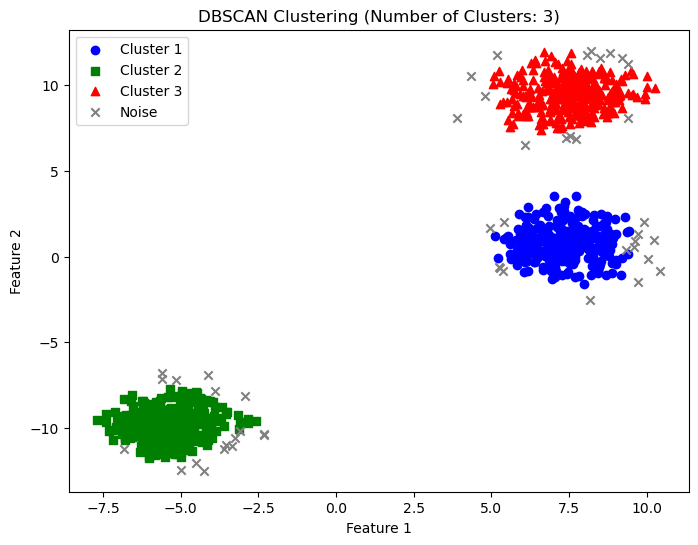

In [20]:
# DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5)
y_db = db.fit_predict(X)

# Number of clusters in labels, ignoring noise if present (-1)
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[y_db == 0][:, 0], X[y_db == 0][:, 1], c='blue', marker='o', label='Cluster 1')
plt.scatter(X[y_db == 1][:, 0], X[y_db == 1][:, 1], c='green', marker='s', label='Cluster 2')
plt.scatter(X[y_db == 2][:, 0], X[y_db == 2][:, 1], c='red', marker='^', label='Cluster 3')
plt.scatter(X[y_db == -1][:, 0], X[y_db == -1][:, 1], c='gray', marker='x', label='Noise')

# plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], c='blue', marker='o', label='Cluster 1')
# plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], c='green', marker='s', label='Cluster 2')
# plt.scatter(X[y_db == 2, 0], X[y_db == 2, 1], c='red', marker='^', label='Cluster 3')
# plt.scatter(X[y_db == -1, 0], X[y_db == -1, 1], c='gray', marker='x', label='Noise')


plt.legend(loc='best')
plt.title(f"DBSCAN Clustering (Number of Clusters: {n_clusters_})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Grid based clustering

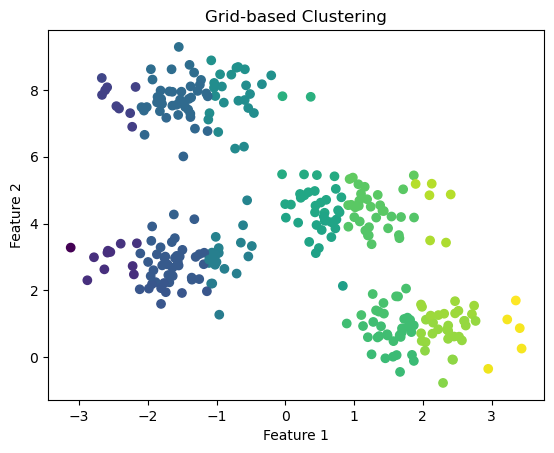

In [21]:
#Grid Based Clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=.6, random_state=0)

# Set the grid size (you can adjust this based on your data distribution)
grid_size = 1.0

# Get the minimum and maximum values for x and y coordinates
x_min, x_max = data[:, 0].min(), data[:, 0].max()
y_min, y_max = data[:, 1].min(), data[:, 1].max()


# Create a grid by defining intervals using the minimum and maximum values
x_grid = np.arange(x_min, x_max + grid_size, grid_size)
y_grid = np.arange(y_min, y_max + grid_size, grid_size)


# Initialize labels array with zeros
labels = np.zeros(data.shape[0], dtype=int)


# Assign each data point to a grid cell based on its coordinates
for i, point in enumerate(data):
    x, y = point
    x_label = np.searchsorted(x_grid, x) - 1
    y_label = np.searchsorted(y_grid, y) - 1
    labels[i] = x_label * len(y_grid) + y_label


# Visualize the clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title('Grid-based Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()